<a href="https://colab.research.google.com/github/CLEONG123/Project/blob/main/ProyectoDSParteI%2BGonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titulo: Análisis de venta de máquinas expendedoras

Autores:César Gonzalez


Definición del problema

R: Estudio de las preferencias del consumidor sobre compras en máquinas expendedoras

Objetivo

R: Entender la tendencia estacional del consumo de productos según el medio de pago aplicado

Hipótesis:

R:Hipótesis: "Las ventas realizadas en efectivo durante el año son predominantemente para la compra de snacks en comparación con otras categorías de productos en la máquina expendedora."

Hipótesis nula (H₀): "No existe diferencia significativa en las ventas en efectivo entre snacks y otras categorías de productos."

Hipótesis alternativa (H₁): "Las ventas en efectivo son significativamente mayores para los snacks en comparación con otras categorías de productos."



In [1]:
! git clone https://github.com/CLEONG123/Project.git

Cloning into 'Project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 141.08 KiB | 6.72 MiB/s, done.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/Project/vending_machine_sales.csv")

In [17]:
data.head()



,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9617 non-null   object 
 1   Device ID    9617 non-null   object 
 2   Location     9617 non-null   object 
 3   Machine      9617 non-null   object 
 4   Product      9611 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9617 non-null   int64  
 7   TransDate    9617 non-null   object 
 8   Type         9617 non-null   object 
 9   RCoil        9617 non-null   int64  
 10  RPrice       9617 non-null   float64
 11  RQty         9617 non-null   int64  
 12  MCoil        9617 non-null   int64  
 13  MPrice       9614 non-null   float64
 14  MQty         9617 non-null   int64  
 15  LineTotal    9617 non-null   float64
 16  TransTotal   9617 non-null   float64
 17  Prcd Date    9617 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

In [22]:
data = data.dropna(subset="Product")
data =data.dropna(subset="Category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9350 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9350 non-null   object 
 1   Device ID    9350 non-null   object 
 2   Location     9350 non-null   object 
 3   Machine      9350 non-null   object 
 4   Product      9350 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9350 non-null   int64  
 7   TransDate    9350 non-null   object 
 8   Type         9350 non-null   object 
 9   RCoil        9350 non-null   int64  
 10  RPrice       9350 non-null   float64
 11  RQty         9350 non-null   int64  
 12  MCoil        9350 non-null   int64  
 13  MPrice       9350 non-null   float64
 14  MQty         9350 non-null   int64  
 15  LineTotal    9350 non-null   float64
 16  TransTotal   9350 non-null   float64
 17  Prcd Date    9350 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage: 1.4+

<function matplotlib.pyplot.show(close=None, block=None)>

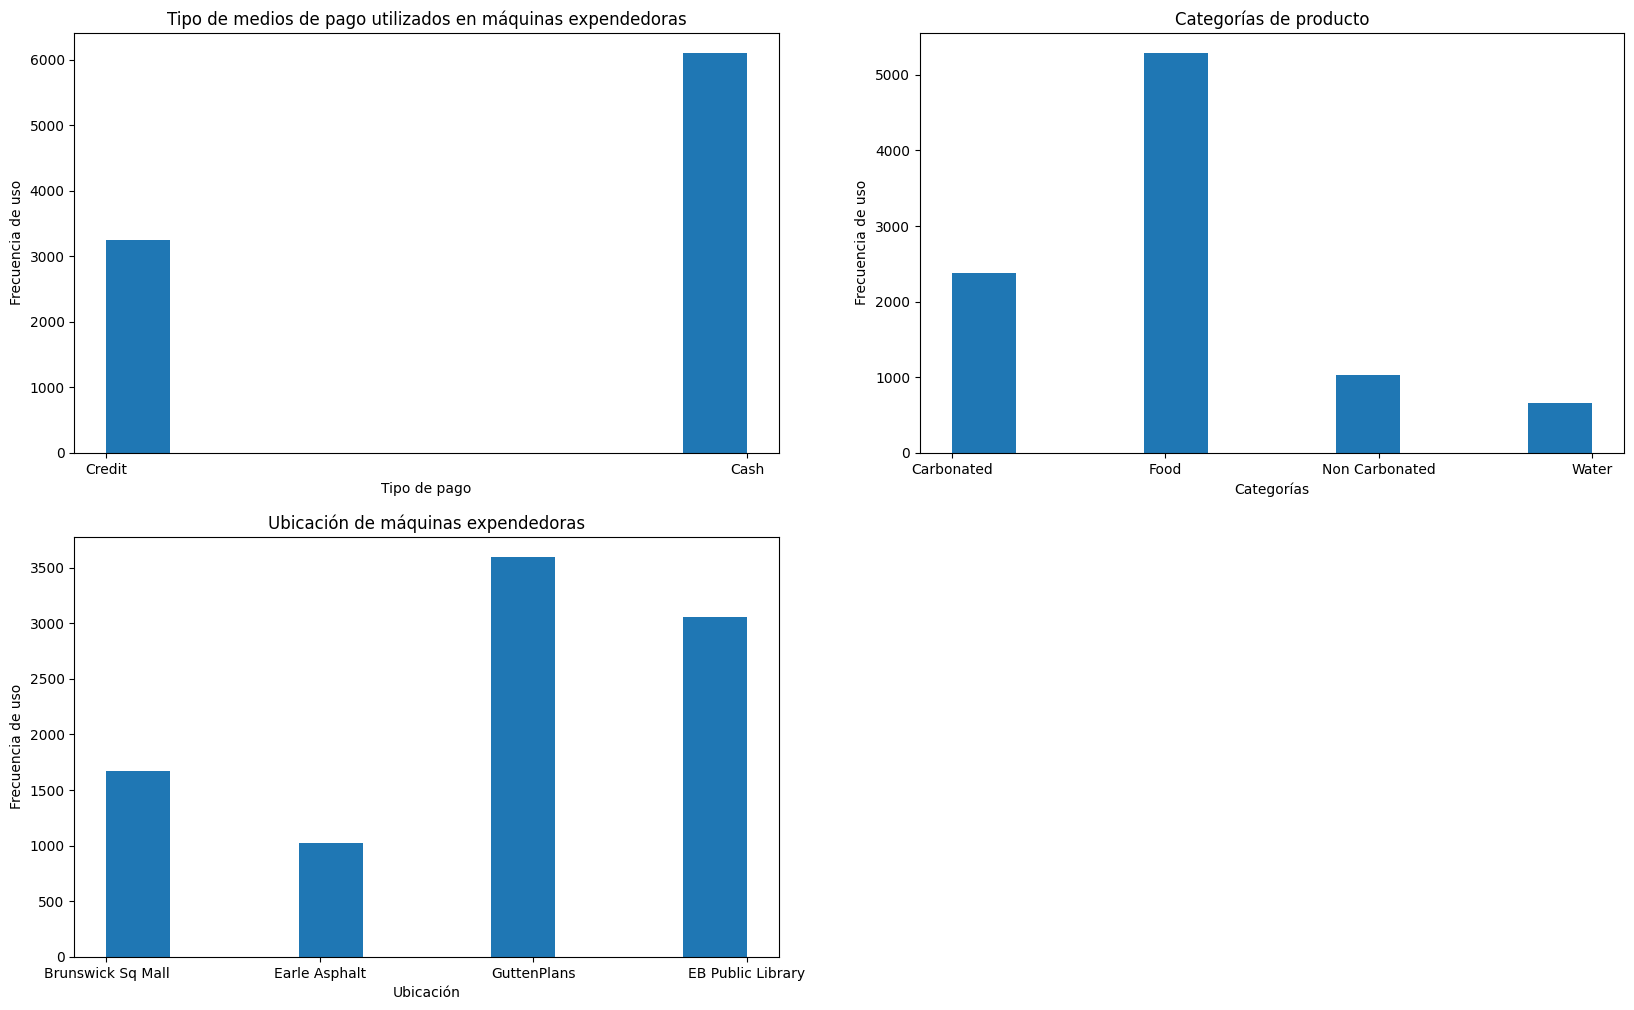

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.hist(data['Type'])
plt.title("Tipo de medios de pago utilizados en máquinas expendedoras")
plt.xlabel("Tipo de pago")
plt.ylabel("Frecuencia de uso")


plt.subplot(2,2,2)
plt.hist(data['Category'])
plt.title("Categorías de producto")
plt.xlabel("Categorías")
plt.ylabel("Frecuencia de uso")

plt.subplot(2,2,3)
plt.hist(data['Location'])
plt.title("Ubicación de máquinas expendedoras")
plt.xlabel("Ubicación")
plt.ylabel("Frecuencia de uso")

plt.show

In [81]:
from datetime import datetime

data2=data.loc[:,["Prcd Date","Category","RQty"]]
data2["fecha"]=pd.to_datetime(data2["Prcd Date"])
data2["mes"]=data2["fecha"].apply(lambda x: x.month)
data2=data2.groupby(["mes","Category",]).agg({'RQty':'sum'}).reset_index()
print(data2)

data3=data2.pivot(index="mes",columns="Category",values="RQty").reset_index()
print(data3)



    mes        Category  RQty
0     1      Carbonated   152
1     1            Food   260
2     1  Non Carbonated    50
3     1           Water    38
4     2      Carbonated   162
5     2            Food   252
6     2  Non Carbonated    52
7     2           Water    36
8     3      Carbonated   164
9     3            Food   380
10    3  Non Carbonated    45
11    3           Water    43
12    4      Carbonated   262
13    4            Food   449
14    4  Non Carbonated    83
15    4           Water    74
16    5      Carbonated   182
17    5            Food   477
18    5  Non Carbonated   102
19    5           Water    78
20    6      Carbonated   192
21    6            Food   552
22    6  Non Carbonated   109
23    6           Water    80
24    7      Carbonated   289
25    7            Food   555
26    7  Non Carbonated   147
27    7           Water    94
28    8      Carbonated   224
29    8            Food   494
30    8  Non Carbonated   114
31    8           Water    47
32    9   

<function matplotlib.pyplot.show(close=None, block=None)>

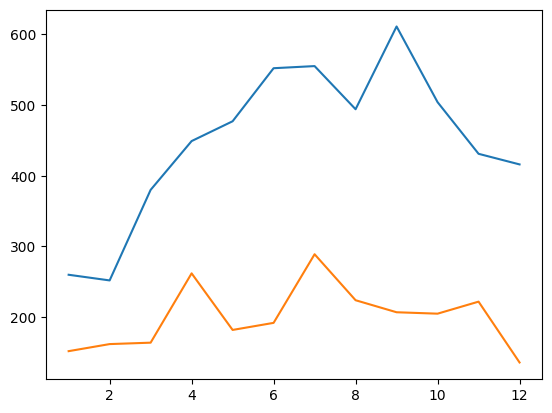

In [82]:
plt.plot(data3.loc[:,"mes"],data3.loc[:,"Food"])
plt.plot(data3.loc[:,"mes"],data3.loc[:,"Carbonated"])
plt.show